In [300]:
! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-25 22:12:10--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘raw.githubusercontent.com’


In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [302]:
df = pd.read_csv("housing.csv")

/opt/homebrew/Caskroom/miniconda/base/envs/zoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/zoomcamp/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='median_house_value', ylabel='Count'>

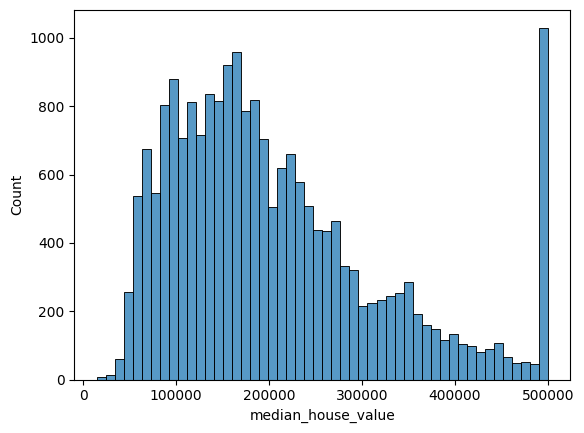

In [303]:
sns.histplot(df["median_house_value"], bins=50)

median_house_value has tail

In [304]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [305]:
columns = [
'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'
]

In [306]:
df = df.loc[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])][columns].reset_index(drop=True)

## Question 1
There's one feature with missing values. What is it?

    total_rooms
    total_bedrooms
    population
    households

In [307]:
df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Answer:** total_bedrooms

## Question 2
What's the median (50% percentile) for variable 'population'?

    995
    1095
    1195
    1295

In [308]:
df['population'].median()

1195.0

**Answer**: 1195

1. Prepare and split the dataset
2. Shuffle the dataset (the filtered one you created above), use seed 42.
3. Split your data in train/val/test sets, with 60%/20%/20% distribution.
4. Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [309]:
np.random.seed(42)

In [310]:
n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [311]:
df.median_house_value.describe()

count     15687.000000
mean     191943.020017
std      108801.077620
min       14999.000000
25%      111300.000000
50%      166900.000000
75%      241100.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [312]:
df['median_house_value'] = np.log1p(df['median_house_value'])

In [313]:
df.median_house_value.describe()

count    15687.000000
mean        12.010342
std          0.564962
min          9.615805
25%         11.619994
50%         12.025156
75%         12.392971
max         13.122367
Name: median_house_value, dtype: float64

In [314]:
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [315]:
idx

array([15183,  4469,  9316, ...,  5390,   860,  7270])

In [316]:
df_shuffled.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15183,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,11.161963
4469,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,12.321635
9316,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,12.471896
4983,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,12.359227
13154,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,12.574531


In [317]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

### Question 3
1. We need to deal with missing values for the column from Q1.
2. We have two options: fill it with 0 or with the mean of this variable.
3. Try both options. For each, train a linear regression model without regularization using the code from the lessons.
4. For computing the mean, use the training only!
5. Use the validation dataset to evaluate the models and compare the RMSE of each option.
6. Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?
Options:

1. With 0
2. With mean
3. Both are equally good

In [318]:
mean_tbd = df_train['total_bedrooms'].mean()

In [319]:
df_train.total_bedrooms.describe()

count    9319.000000
mean      542.552956
std       443.541176
min         2.000000
25%       294.000000
50%       431.000000
75%       646.000000
max      6445.000000
Name: total_bedrooms, dtype: float64

In [320]:
mean_tbd

542.552956325786

In [321]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [322]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [323]:
base = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income'
]

In [324]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [325]:
def fill_train_get_rmse(train_df, val_df, fill_val):
    train_df['total_bedrooms'].fillna(fill_val, inplace=True)
    print(train_df.isna().sum())
    print(train_df.shape)
    
    x = prepare_X(train_df)
    y = train_df['median_house_value'].values
    print(x.shape, y.shape)
    
    const, weights = train_linear_regression(x, y)
    print(const, weights)
    y_pred = const + x.dot(weights)
    
#     sns.histplot(y_31, label='target', alpha=0.6, bins=40)
#     sns.histplot(y_31_pred, label='prediction', alpha=0.8, bins=40)
#     plt.legend()
    
#     train_rmse = rmse(y, y_pred)
    
    val_x = prepare_X(val_df)
    val_y = val_df['median_house_value'].values
    print(val_x.shape, val_y.shape)
    
    val_y_pred = const + val_x.dot(weights)
    val_y_actual = np.expm1(val_y)
    val_y_pred_actual = np.expm1(val_y_pred)
    
    return rmse(val_y_actual, val_y_pred_actual)

In [326]:
df_train.median_house_value.describe()

count    9413.000000
mean       12.015274
std         0.564028
min         9.615805
25%        11.625370
50%        12.033509
75%        12.399586
max        13.122367
Name: median_house_value, dtype: float64

In [327]:
df_val.median_house_value.describe()

count    3137.000000
mean       12.000232
std         0.574142
min         9.615805
25%        11.600945
50%        12.008847
75%        12.386313
max        13.122367
Name: median_house_value, dtype: float64

In [328]:
zero_fill_df = df_train.copy()
zero_fill_val_df = df_val.copy()
zero_fill_rmse = fill_train_get_rmse(zero_fill_df, zero_fill_val_df, 0)
round(zero_fill_rmse, 2)

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
(9413, 9)
(9413, 8) (9413,)
-9.763249477638546 [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]
(3137, 8) (3137,)


92668.63

In [329]:
mean_fill_df = df_train.copy()
mean_fill_val_df = df_val.copy()
mean_fill_rmse = fill_train_get_rmse(mean_fill_df, mean_fill_val_df, mean_tbd)
round(mean_fill_rmse, 2)

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64
(9413, 9)
(9413, 8) (9413,)
-9.886133216127304 [-2.68652914e-01 -2.57026361e-01  1.79880767e-03 -3.87631029e-05
  3.78806885e-04 -1.49641599e-04  3.25344392e-04  1.81951358e-01]
(3137, 8) (3137,)


93640.74

**Answer:** Both are equally good

### Question 4

1. Now let's train a regularized linear regression.
2. For this question, fill the NAs with 0.
3. Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
4. Use RMSE to evaluate the model on the validation dataset.
5. Round the RMSE scores to 2 decimal digits.
6. Which r gives the best RMSE?
7. If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001

In [330]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [331]:
reg_rmse_dict = {}

In [332]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    train_df = df_train.copy()
    train_df.fillna(0, inplace=True)

    x = prepare_X(train_df)
    y = train_df['median_house_value'].values
    const, weights = train_linear_regression_reg(x, y, r)
    print(const, weights)
    y_pred = const + x.dot(weights)
    
    val_df = df_val.copy()
    val_df.fillna(0, inplace=True)
    val_x = prepare_X(val_df)
    val_y = val_df['median_house_value'].values
    print(val_x.shape, val_y.shape)
    
    val_y_pred = const + val_x.dot(weights)
    val_y_actual = np.expm1(val_y)
    val_y_pred_actual = np.expm1(val_y_pred)
    
    reg_rmse_dict["%s" % r] = round(rmse(val_y_actual, val_y_pred_actual), 2)

-9.763249477638546 [-2.68233309e-01 -2.55938802e-01  1.77710730e-03 -3.38393956e-05
  2.93766352e-04 -1.52190447e-04  3.96908643e-04  1.80600946e-01]
(3137, 8) (3137,)
-9.76322883076761 [-2.68233130e-01 -2.55938574e-01  1.77710920e-03 -3.38394344e-05
  2.93766187e-04 -1.52190443e-04  3.96909047e-04  1.80600973e-01]
(3137, 8) (3137,)
-9.761185235494285 [-2.68215347e-01 -2.55916002e-01  1.77729760e-03 -3.38432775e-05
  2.93749821e-04 -1.52190058e-04  3.96948960e-04  1.80603655e-01]
(3137, 8) (3137,)
-9.742646249238598 [-2.68054028e-01 -2.55711238e-01  1.77900669e-03 -3.38781406e-05
  2.93601353e-04 -1.52186566e-04  3.97311043e-04  1.80627981e-01]
(3137, 8) (3137,)
-9.561056192626364 [-2.66473898e-01 -2.53705567e-01  1.79574734e-03 -3.42196251e-05
  2.92147094e-04 -1.52152368e-04  4.00857666e-04  1.80866259e-01]
(3137, 8) (3137,)
-8.05888976905374 [-2.53402467e-01 -2.37114022e-01  1.93423469e-03 -3.70443987e-05
  2.80116566e-04 -1.51869463e-04  4.30196518e-04  1.82837279e-01]
(3137, 8) (3

In [333]:
reg_rmse_dict

{'0': 92668.63,
 '1e-06': 92668.64,
 '0.0001': 92669.97,
 '0.001': 92682.08,
 '0.01': 92801.3,
 '0.1': 93834.32,
 '1': 97782.69,
 '5': 99882.5,
 '10': 100248.04}

**Answer:** 0 

### Question 5
1. We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
2. Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
3. For each seed, do the train/validation/test split with 60%/20%/20% distribution.
4. Fill the missing values with 0 and train a model without regularization.
5. For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
6. What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
7. Round the result to 3 decimal digits (round(std, 3))
8. What's the value of std?


    0.5
    
    0.05
    
    0.005
    
    0.0005

**Note:** Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [334]:
seed_score_dict = {}

In [335]:
def train_get_rmse(train_df, val_df):
    print(train_df.shape)
    
    x = prepare_X(train_df)
    y = train_df['median_house_value'].values
    print(x.shape, y.shape)
    
    const, weights = train_linear_regression(x, y)
    print(const, weights)
    y_pred = const + x.dot(weights)
    
    val_x = prepare_X(val_df)
    val_y = val_df['median_house_value'].values
    print(val_x.shape, val_y.shape)
    
    val_y_pred = const + val_x.dot(weights)
    val_y_actual = np.expm1(val_y)
    val_y_pred_actual = np.expm1(val_y_pred)
    
    return rmse(val_y_actual, val_y_pred_actual)

In [336]:
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    
    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_s = df.fillna(0)
    df_shuffled = df_s.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    rmse_val = train_get_rmse(df_train, df_val)
    seed_score_dict[seed] = rmse_val

(9413, 9)
(9413, 8) (9413,)
-9.870068971558034 [-2.71538872e-01 -2.57905892e-01  1.43874092e-03 -3.28506955e-05
  2.74955467e-04 -1.50515777e-04  4.07441495e-04  1.79439347e-01]
(3137, 8) (3137,)
(9413, 9)
(9413, 8) (9413,)
-9.114011210006403 [-2.67111799e-01 -2.50366564e-01  1.68367550e-03 -2.17079992e-05
  2.74621608e-04 -2.07918083e-04  4.81989214e-04  1.78044406e-01]
(3137, 8) (3137,)
(9413, 9)
(9413, 8) (9413,)
-9.911560201543226 [-2.69914047e-01 -2.57559087e-01  1.92264005e-03 -3.40679630e-05
  3.03040321e-04 -1.49763515e-04  3.88143978e-04  1.82156954e-01]
(3137, 8) (3137,)
(9413, 9)
(9413, 8) (9413,)
-10.233183681462807 [-2.73049563e-01 -2.61342089e-01  1.84153315e-03 -2.95482594e-05
  2.64770777e-04 -1.48513120e-04  3.88427823e-04  1.79059417e-01]
(3137, 8) (3137,)
(9413, 9)
(9413, 8) (9413,)
-9.174763450447276 [-2.62029994e-01 -2.48890011e-01  2.27919844e-03 -3.57206479e-05
  3.08606461e-04 -1.41923501e-04  3.59844023e-04  1.84951730e-01]
(3137, 8) (3137,)
(9413, 9)
(9413, 8)

In [337]:
seed_score_dict

{0: 79324.59004769362,
 1: 88606.9655931196,
 2: 80255.80975484001,
 3: 84296.25991061829,
 4: 96310.06458068211,
 5: 81287.58966231822,
 6: 78620.86086462747,
 7: 77950.99598432939,
 8: 96180.49012265273,
 9: 78004.60334557778}

In [296]:
score_arr = np.array(list(seed_score_dict.values()))

In [297]:
score_arr

array([79324.59004769, 88606.96559312, 80255.80975484, 84296.25991062,
       96310.06458068, 81287.58966232, 78620.86086463, 77950.99598433,
       96180.49012265, 78004.60334558])

In [298]:
np.std(score_arr)

6825.317763340564

In [299]:
round(np.std(score_arr), 3)

6825.318

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.13
0.23
0.33
0.43
